# Section 1: Merging Data

### Dependencies and Setup

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### File to Load

In [41]:
city_data_to_load = "Resources/city_data.csv"
city_data_to_load

'Resources/city_data.csv'

In [42]:
ride_data_to_load = "Resources/ride_data.csv"
ride_data_to_load

'Resources/ride_data.csv'

### Read the City data

In [43]:
city_df = pd.read_csv(city_data_to_load)
city_df.head()


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [44]:
city_df.tail()

,city,driver_count,type
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural
119,South Saramouth,7,Rural


### Read the Ride Data

In [45]:
ride_df = pd.read_csv(ride_data_to_load)
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [46]:
ride_df.tail()

,city,date,fare,ride_id
2370,Michaelberg,2018-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2018-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2018-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2018-05-07 19:22:15,44.94,4256853490277
2374,Newtonview,2018-04-25 10:20:13,55.84,9990581345298


### Combine the data into a single dataset

In [47]:
combined_df = pd.merge(ride_df,city_df,on ="city", how ="left")
combined_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [48]:
combined_df.tail()

,city,date,fare,ride_id,driver_count,type
2370,Michaelberg,2018-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2018-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2018-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2018-05-07 19:22:15,44.94,4256853490277,4,Rural
2374,Newtonview,2018-04-25 10:20:13,55.84,9990581345298,1,Rural


# Section 2: Bubble Plot of Ride Sharing Data

## Ride Data

### Rural

In [49]:
combined_df_rural = combined_df.loc[combined_df["type"]=="Rural"]
combined_df_rural_group = combined_df_rural.groupby("city")

##### Calculations

In [50]:
combined_df_rural_group_average = combined_df_rural_group["fare"].mean()
combined_df_rural_group_count = combined_df_rural_group["ride_id"].count()
combined_df_rural_driver_count = combined_df_rural_group["driver_count"].mean()

#### Print Commands

In [51]:
print(combined_df_rural_group_average.head())
print(combined_df_rural_driver_count.head())
print(combined_df_rural_group_count.head())

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64
city
Bradshawfurt      7
Garzaport         7
Harringtonfort    4
Jessicaport       1
Lake Jamie        4
Name: driver_count, dtype: int64
city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64


### Suburban

In [52]:
combined_df_suburban = combined_df.loc[combined_df["type"]=="Suburban"]
combined_df_suburban_group = combined_df_suburban.groupby("city")

##### Calculations

In [53]:
combined_df_suburban_group_average = combined_df_suburban_group["fare"].mean()
combined_df_suburban_group_count = combined_df_suburban_group["ride_id"].count()
combined_df_suburban_driver_count = combined_df_suburban_group["driver_count"].mean()

#### Print Commands

In [54]:
print(combined_df_suburban_group_average.head())
print(combined_df_suburban_driver_count.head())
print(combined_df_suburban_group_count.head())

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64
city
Barronchester    11
Bethanyland      22
Brandonfort      10
Colemanland      23
Davidfurt        23
Name: driver_count, dtype: int64
city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64


 ### Urban

In [55]:
combined_df_urban = combined_df.loc[combined_df["type"]=="Urban"]  
combined_df_urban_group = combined_df_urban.groupby("city")

In [56]:
combined_df_urban_group_average = combined_df_urban_group["fare"].mean()
combined_df_urban_group_count = combined_df_urban_group["ride_id"].count()
combined_df_urban_driver_count = combined_df_urban_group["driver_count"].mean()

In [57]:
print(combined_df_urban_group_average.head())
print(combined_df_urban_driver_count.head())
print(combined_df_urban_group_count.head())

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64
city
Amandaburgh        12
Barajasview        26
Carriemouth        52
Christopherfurt    41
Deanville          49
Name: driver_count, dtype: int64
city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64


### Build the scatter plots for each city types

#### Rural

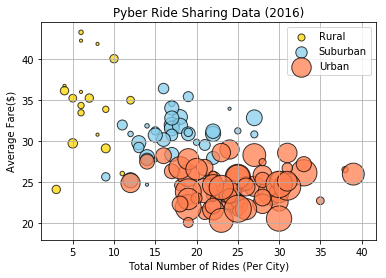

In [86]:
plt.scatter(combined_df_rural_group_count, combined_df_rural_group_average,s=combined_df_rural_driver_count*10,
            alpha=0.75, facecolors="gold", edgecolors="black", 
            marker="o", label="Rural")

plt.scatter(combined_df_suburban_group_count, combined_df_suburban_group_average,s=combined_df_suburban_driver_count*10,
            alpha=0.75, facecolors="skyblue", edgecolors="black", 
            marker="o", label="Suburban")

plt.scatter(combined_df_urban_group_count, combined_df_urban_group_average,s=combined_df_urban_driver_count*10,
            alpha=0.75, facecolors="coral", edgecolors="black", 
            marker="o", label="Urban")

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
###plt.legend(loc= "upper right", l)
plt.legend()
plt.grid()
plt.show()


In [85]:
plt.savefig('pyber_ridesharedata.pdf')

<Figure size 432x288 with 0 Axes>

## Total Fares by City Type

### Calculate Type Percents

In [64]:
combined_df2 = combined_df
combined_df2_typefare = combined_df2.groupby("type")["fare"].sum()
combined_df2_typefare

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

### Build Pie Chart

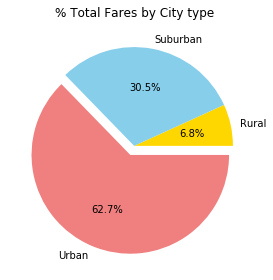

In [88]:
explode = (0, 0, 0.1)

labels=("Rural","Suburban","Urban")

colors=("gold","skyblue","lightcoral")

plt.pie(combined_df2_typefare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%")

plt.title("% Total Fares by City type")

plt.tight_layout()

plt.show()

### Save Figure

In [62]:
plt.savefig('pyber_citytypefares.pdf')

<Figure size 432x288 with 0 Axes>

## Total Rides by City Type

### Calculate Ride Percents

In [69]:
combined_df2 = combined_df
combined_df2_ridetype = combined_df2.groupby("type")["ride_id"].count()
combined_df2_ridetype

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

### Build Pie Chart

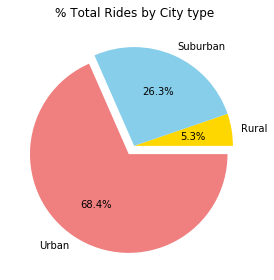

In [81]:
explode = (0, 0, 0.1)

labels=("Rural","Suburban","Urban")

colors=("gold","skyblue","lightcoral")

plt.pie(combined_df2_ridetype, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%")

plt.title("% Total Rides by City type")

plt.tight_layout()

plt.show()

### Save Figure

In [ ]:
plt.savefig('pyber_ridetype.pdf')

## Total Drivers by City Type

### Calculate Driver Percents

In [77]:
city_df2 = city_df
city_df2_drivercount = city_df2.groupby("type")["driver_count"].sum()
city_df2_drivercount 

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

### Build Pie Charts

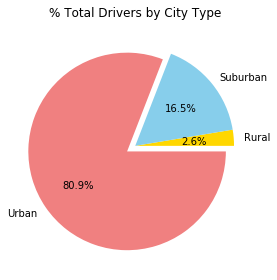

In [82]:
explode = (0, 0, 0.1)

labels=("Rural","Suburban","Urban")

colors=("gold","skyblue","lightcoral")

plt.pie(city_df2_drivercount, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%")

plt.title("% Total Drivers by City Type")

plt.tight_layout()

plt.show()

### Save Figure

In [84]:
plt.savefig('pyber_drivertype.pdf')

<Figure size 432x288 with 0 Axes>